In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from fbprophet import Prophet
from sklearn.metrics import r2_score,mean_squared_error
from statsmodels.tsa.arima_model import ARIMA
data=pd.read_pickle('AQI-FE1-Binarized.pkl')

In [2]:
dx=data[[ 'Month', 'Quarter', 'Dayofweek', 'HourofDay',
       'DayofMonth', 'Dayoftheyear', 'Monday', 'Tuesday', 'Wednesday',
       'Thursday', 'Friday', 'Saturday', 'Sunday','T']]

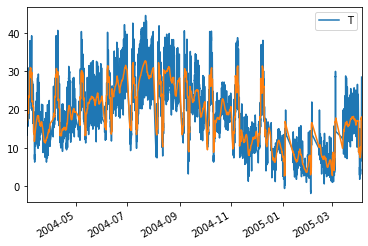

In [28]:
fig, ax = plt.subplots()
#finding trend using rolling window operation
dx1=dx['T'].rolling(window=72, center=True, min_periods=24).mean()
dx.plot(y='T',ax=ax)
dx1.plot(y='T', ax=ax)


In [29]:
dx1.isna().sum()/dx.size

0.0

In [30]:
dx1

2004-10-03 18:00:00     9.744444
2004-10-03 19:00:00     9.664865
2004-10-03 20:00:00     9.578947
2004-10-03 21:00:00     9.520513
2004-10-03 22:00:00     9.512500
                         ...    
2005-04-04 10:00:00    17.614634
2005-04-04 11:00:00    17.727500
2005-04-04 12:00:00    17.835897
2005-04-04 13:00:00    17.950000
2005-04-04 14:00:00    18.091892
Name: T, Length: 8349, dtype: float64

In [6]:
model = ARIMA(dx['T'].loc[:'2004-12-31'].values, order=(27,1,0))

In [7]:
history=dx['T'].loc[:'2004-12-31'].values.tolist()

In [8]:
predictions=list()
for t in range(0,24*3):
    model = ARIMA(history, order=(1,1,1))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0][0]
    predictions.append(yhat)
    #obs = test[t]
    history.append(yhat)
    out=int(round(yhat,0))

In [9]:
predictions.__len__()

72

In [10]:
dx['T'].loc['2005-1-1':'2005-1-3'].values.size

72

In [11]:
plotdx=dx['T'].loc['2005-1-1':'2005-1-3']

In [12]:
plotdxy=pd.DataFrame(predictions,columns=['y'])
plotdxy.index=plotdx.index


In [13]:
plotd=pd.concat([plotdx,plotdxy],axis=1)

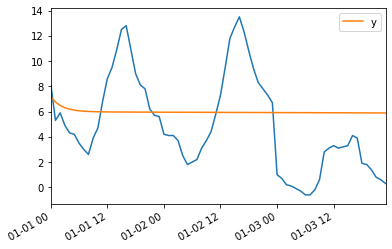

In [14]:
fig, ax = plt.subplots()
plt.plot(plotd.index, plotd['T'].values) 
plotd.plot(y='y', ax=ax)